In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import emoji
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=120)

<Figure size 960x720 with 0 Axes>

<Figure size 960x720 with 0 Axes>

# Preporcessing
-----

In [73]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [74]:
symbols = [".", '"', "!", "'", "?"]

def remove_symbols(df):
    def clean(tweet):
        for s in symbols:
            tweet = tweet.replace(s, '')
        return tweet
    df["Tweet"] = df["Tweet"].map(lambda x: clean(x))
    return df


In [75]:
def extrakt_ref(df):
    def get_persons(tweet):
        val = []
        for word in tweet.split(" "):
            if word.startswith("@"):
                val.append(word)
        return val

    def get_persons_num(tweet):
        return len(get_persons(tweet))

    df["taged_persons"] = df["Tweet"].map(lambda x: get_persons(x))
    df["taged_persons_num"] = df["Tweet"].map(lambda x: get_persons_num(x))
    return df



In [76]:
def extrakt_hash(df):
    def get_hash(tweet):
        val = []
        for word in tweet.split(" "):
            if word.startswith("#"):
                val.append(word)
        return val

    def get_hash_num(tweet):
        return len(get_hash(tweet))

    df["hashtags"] = df["Tweet"].map(lambda x: get_hash(x))
    df["hasgtags_num"] = df["Tweet"].map(lambda x: get_hash_num(x))
    return df

In [77]:
def extract_emojis(df):
    def transform(tweet):
        val = (''.join(c for c in tweet if c in emoji.UNICODE_EMOJI['en'])).split()
        return val

    def transform_len(tweet):
        return len(transform(tweet))

    df["emojis"] = df["Tweet"].map(lambda x: transform(x))
    df["emojis_len"] = df["Tweet"].map(lambda x: transform_len(x))
    return df

In [78]:
def split_word(df):
    def split_words(tweet):
        val = []
        for word in tweet.split(" "):
            if word.startswith("#") or word.startswith("@") or word == "":
                continue    
            val.append(word)
        return val

    def split_words_len(tweet):
        val = []
        for word in tweet.split(" "):
            if word.startswith("#") or word.startswith("@"):
                continue    
            val.append(word)
        return len(val)

    df["words"] = df["Tweet"].map(lambda x: split_words(x))
    df["words_len"] = df["Tweet"].map(lambda x: split_words_len(x))
    return df

In [79]:
def remove_stop_words(df):
    def transform(tweet):
        val = []
        for word in tweet:
            if word.lower() not in stopwords:
                val.append(word)
        return val

    def transform_len(tweet):
        return len(transform(tweet))

    df["words_clean"] = df["words"].map(lambda x: transform(x))
    df["words_clean_len"] = df["words"].map(lambda x: transform_len(x))
    df["removed_words"] = df["words_len"]-df["words_clean_len"]
    return df

In [80]:
def remove_emojis(df):
    df["words_clean"] = df["words_clean"].map(lambda row: (''.join([x for x in ' '.join(row) if x not in emoji.emoji.UNICODE_EMOJI['en']])).split(" "))
    return df


In [81]:
def create_dataset():
    chain = [
        remove_symbols,
        extrakt_ref,
        extrakt_hash,
        extract_emojis,
        split_word,
        remove_stop_words,
        remove_emojis,
    ]

    data_sets = [
        pd.read_csv("Daten/Tweets/anger.txt", delimiter="\t"),
        pd.read_csv("Daten/Tweets/fear.txt", delimiter="\t"),
        pd.read_csv("Daten/Tweets/joy.txt", delimiter="\t"),
        pd.read_csv("Daten/Tweets/sadness.txt", delimiter="\t"),
    ]

    data_names = ["anger", "fear", "joy", "sadness"]

    for data_set in data_sets:
        for process in chain:
            data_set = process(data_set)
    
    return (data_sets, data_names)

data_sets, data_names = create_dataset()

In [82]:
data_sets[0]

,ID,Tweet,Affect Dimension,Intensity Score,taged_persons,taged_persons_num,hashtags,hasgtags_num,emojis,emojis_len,words,words_len,words_clean,words_clean_len,removed_words
0,2017-En-10264,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger,0.562,"[@xandraaa5, @amayaallyn6]",2,[#offended],1,[],0,"[shut, up, hashtags, are, cool]",5,"[shut, hashtags, cool]",3,2
1,2017-En-10072,it makes me so fucking irate jesus nobody is c...,anger,0.750,[],0,[],0,[],0,"[it, makes, me, so, fucking, irate, jesus, nob...",20,"[makes, fucking, irate, jesus, nobody, calling...",13,7
2,2017-En-11383,Lol Adam the Bull with his fake outrage,anger,0.417,[],0,[],0,[],0,"[Lol, Adam, the, Bull, with, his, fake, outrage]",8,"[Lol, Adam, Bull, fake, outrage]",5,3
3,2017-En-11102,@THATSSHAWTYLO passed away early this morning ...,anger,0.354,[@THATSSHAWTYLO],1,[],0,[],0,"[passed, away, early, this, morning, in, a, fa...",24,"[passed, away, early, morning, fast, furious, ...",16,8
4,2017-En-11506,@Kristiann1125 lol wow i was gonna say really ...,anger,0.438,[@Kristiann1125],1,[],0,[],0,"[lol, wow, i, was, gonna, say, really, haha, h...",21,"[lol, wow, gonna, say, really, haha, seen, chr...",14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2017-En-11110,Got a $20 tip from a drunk Uber passenger Toda...,anger,0.708,[],0,[#rage],1,[],0,"[Got, a, $20, tip, from, a, drunk, Uber, passe...",28,"[Got, $20, tip, drunk, Uber, passenger, Today,...",19,9
1697,2017-En-11497,@Claymakerbigsi @toghar11 @scott_mulligan_ @Bo...,anger,0.625,"[@Claymakerbigsi, @toghar11, @scott_mulligan_,...",4,[],0,[],0,"[Fucker, blocked, me, 2, years, ago, over, a, ...",17,"[Fucker, blocked, 2, years, ago, question, lol...",13,4
1698,2017-En-10539,@vladfucker69 i look rabid,anger,0.472,[@vladfucker69],1,[],0,[],0,"[i, look, rabid]",3,"[look, rabid]",2,1
1699,2017-En-10468,"@m_t_f_72 Im not surprised, I would be fuming 😤",anger,0.479,[@m_t_f_72],1,[],0,[😤],1,"[Im, not, surprised,, I, would, be, fuming, 😤]",8,"[Im, surprised,, would, fuming, ]",5,3


# Basic Statistik
-----

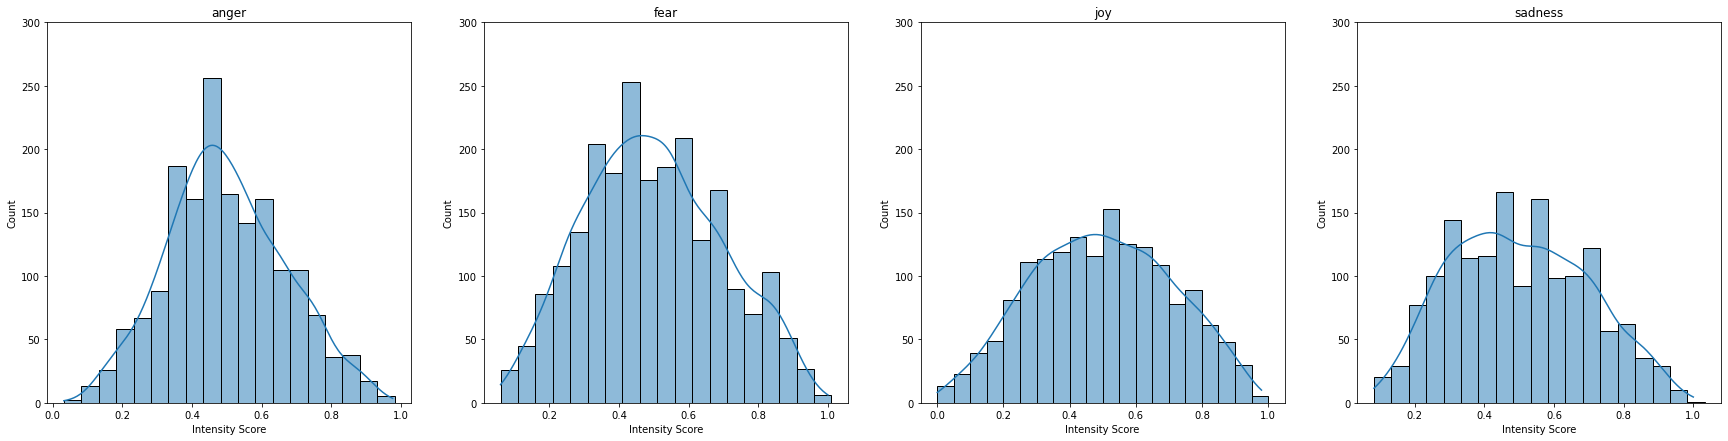

In [83]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30,7)

for ax in axs:
    ax.set(ylim=(0, 300))

for df, name, idx in zip(data_sets, data_names, range(4)):
    sns.histplot(
        data=df, 
        x="Intensity Score",
        binwidth=0.05,
        ax=axs[idx],
        kde=True
    ).set_title(name)

In [84]:
print(data_names[0])
data_sets[0].describe()

anger


,Intensity Score,taged_persons_num,hasgtags_num,emojis_len,words_len,words_clean_len,removed_words
count,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000
mean,0.498671,0.647266,0.857731,0.125220,14.746620,8.207525,6.539095
std,0.169743,0.871901,1.636993,0.331066,6.763735,3.810338,3.821199
min,0.032000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.375000,0.000000,0.000000,0.000000,9.000000,5.000000,3.000000
50%,0.479000,0.000000,0.000000,0.000000,15.000000,8.000000,6.000000
75%,0.625000,1.000000,1.000000,0.000000,20.000000,11.000000,9.000000
max,0.976000,9.000000,14.000000,1.000000,31.000000,21.000000,20.000000


In [85]:
print(data_names[1])
data_sets[1].describe()

fear


,Intensity Score,taged_persons_num,hasgtags_num,emojis_len,words_len,words_clean_len,removed_words
count,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000
mean,0.498317,0.664298,1.252220,0.114565,14.540409,8.002220,6.538188
std,0.197058,0.960853,1.873704,0.318567,6.594942,3.882263,3.654183
min,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.354000,0.000000,0.000000,0.000000,9.750000,5.000000,4.000000
50%,0.479000,0.000000,1.000000,0.000000,15.000000,8.000000,6.000000
75%,0.646000,1.000000,2.000000,0.000000,20.000000,11.000000,9.000000
max,1.000000,8.000000,14.000000,1.000000,31.000000,23.000000,18.000000


In [86]:
print(data_names[2])
data_sets[2].describe()

joy


,Intensity Score,taged_persons_num,hasgtags_num,emojis_len,words_len,words_clean_len,removed_words
count,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000
mean,0.499387,0.599010,0.933168,0.132426,14.290842,8.119431,6.171411
std,0.210959,0.852662,1.570388,0.339058,6.764472,3.880566,3.733334
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.340000,0.000000,0.000000,0.000000,9.000000,5.000000,3.000000
50%,0.500000,0.000000,0.000000,0.000000,14.000000,8.000000,6.000000
75%,0.660000,1.000000,1.000000,0.000000,20.000000,11.000000,9.000000
max,0.980000,7.000000,14.000000,1.000000,32.000000,24.000000,19.000000


In [87]:
print(data_names[3])
data_sets[3].describe()

sadness


,Intensity Score,taged_persons_num,hasgtags_num,emojis_len,words_len,words_clean_len,removed_words
count,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000
mean,0.501705,0.560992,0.958252,0.106327,15.191781,8.541422,6.650359
std,0.195699,0.810162,1.687252,0.308357,6.978595,3.999235,4.030772
min,0.083000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.354000,0.000000,0.000000,0.000000,10.000000,5.000000,4.000000
50%,0.485000,0.000000,0.000000,0.000000,15.000000,8.000000,6.000000
75%,0.646000,1.000000,1.000000,0.000000,21.000000,12.000000,9.000000
max,1.000000,5.000000,13.000000,1.000000,58.000000,21.000000,52.000000


# Histrogram
-----

In [88]:
def print_word_hist(place, data, title, print_val=False):
    n = 20
    counts = Counter(data)
    labels, values = zip(*counts.items())
    indSort = np.argsort(values)[::-1]

    # rearrange your data
    labels = np.array(labels)[indSort][:n]
    values = np.array(values)[indSort][:n]

    if print_val:
        print(title, '\n', labels)

    indexes = np.arange(len(labels))

    place.bar(indexes, values)

    # add labels
    place.set_xticks(indexes + 0, labels)
    place.set_title(title)


## Word Histogram for Tweets

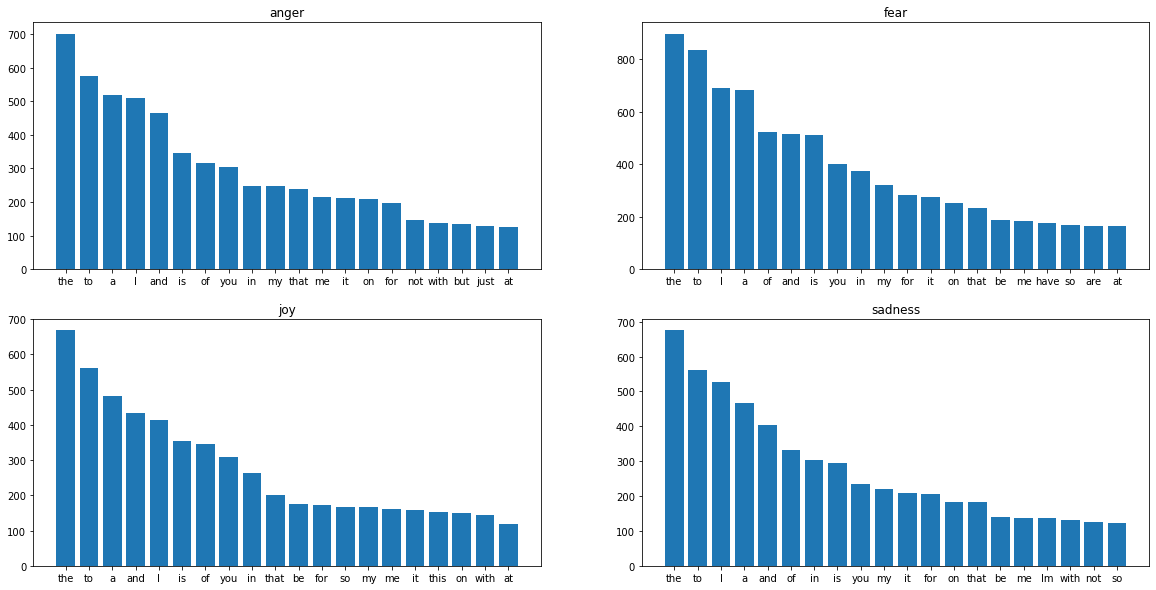

In [89]:
def create_hist_data(df):
    return " ".join(df["Tweet"].to_numpy()).split()


splitted_data = []
for data_set in data_sets:
    splitted_data.append(create_hist_data(data_set))


_figure, axis = plt.subplots(2, 2)
_figure.set_size_inches(20,10)
print_word_hist(place=axis[0, 0], data=splitted_data[0], title=data_names[0])
print_word_hist(place=axis[0, 1], data=splitted_data[1], title=data_names[1])
print_word_hist(place=axis[1, 0], data=splitted_data[2], title=data_names[2])
print_word_hist(place=axis[1, 1], data=splitted_data[3], title=data_names[3])

## Word Histogram for words

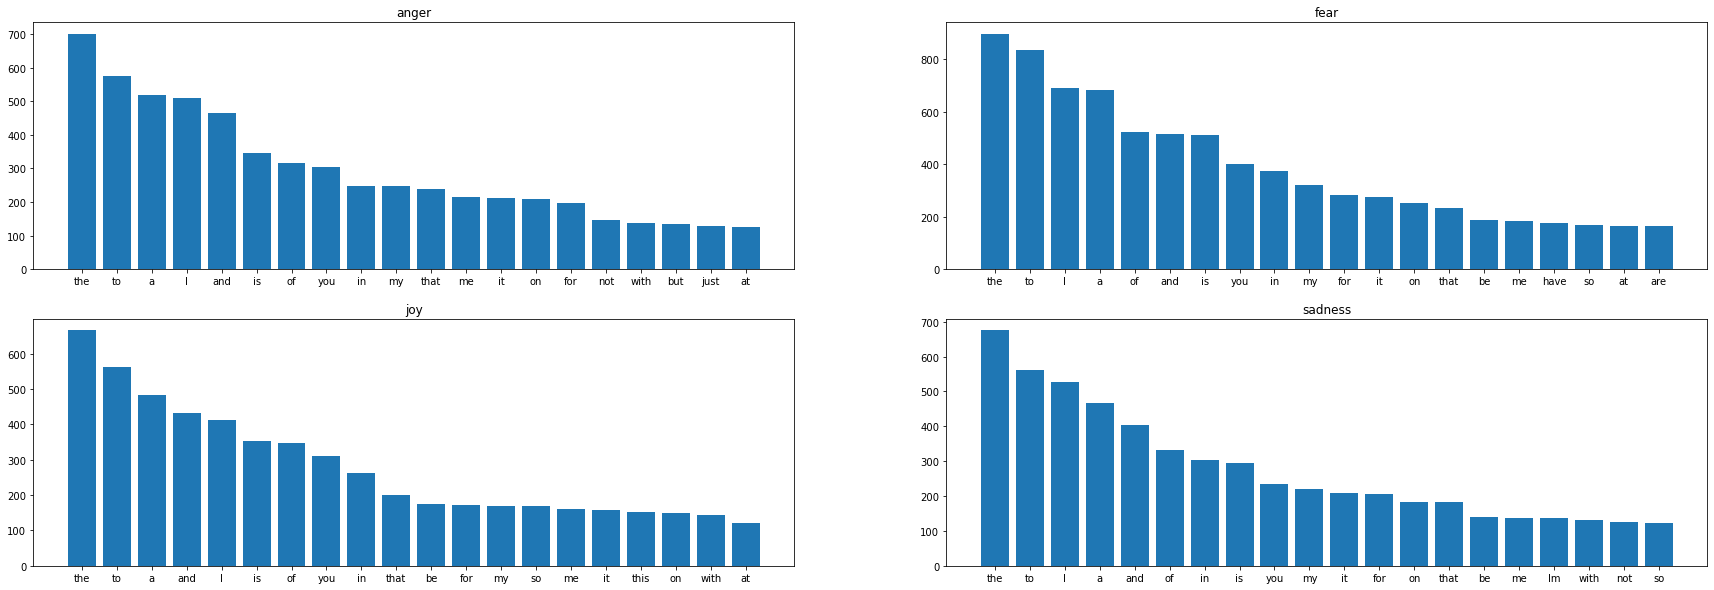

In [90]:
def create_hist_data(df):
    return np.concatenate(df["words"].to_numpy())


splitted_data = []
for data_set in data_sets:
    splitted_data.append(create_hist_data(data_set))


_figure, axis = plt.subplots(2, 2)
_figure.set_size_inches(30,10)
print_word_hist(place=axis[0, 0], data=splitted_data[0], title=data_names[0])
print_word_hist(place=axis[0, 1], data=splitted_data[1], title=data_names[1])
print_word_hist(place=axis[1, 0], data=splitted_data[2], title=data_names[2])
print_word_hist(place=axis[1, 1], data=splitted_data[3], title=data_names[3])

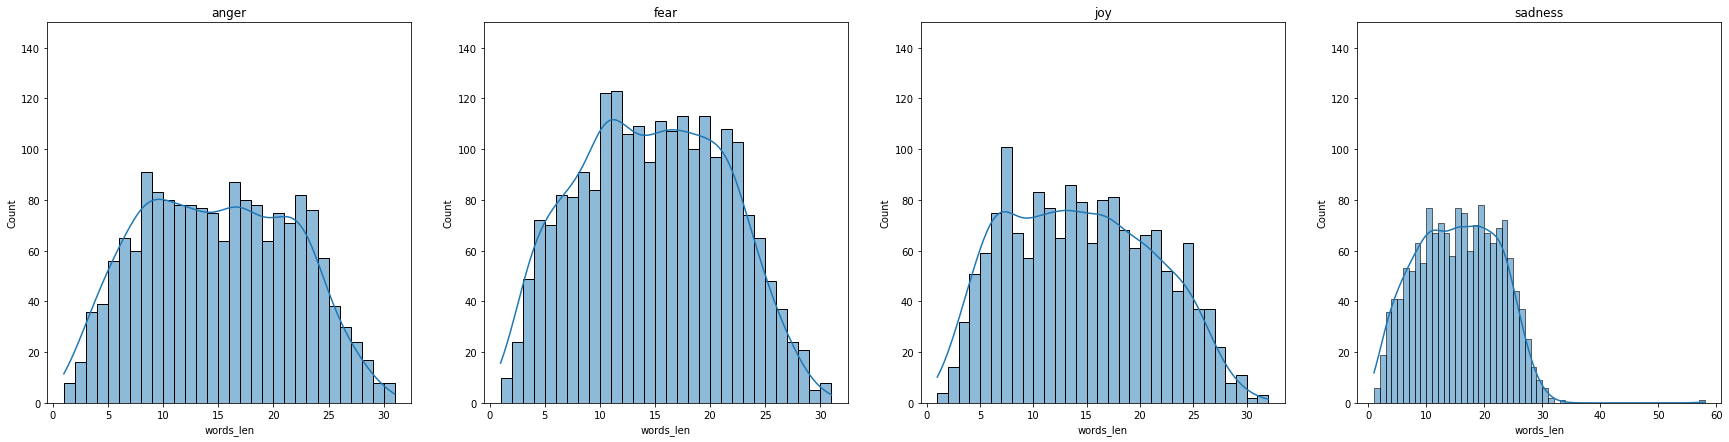

In [91]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30,7)

for ax in axs:
    ax.set(ylim=(0, 150))

for df, name, idx in zip(data_sets, data_names, range(4)):
    sns.histplot(
        data=df, 
        x="words_len",
        binwidth=1,
        ax=axs[idx],
        kde=True
    ).set_title(name)

## Word Histogram for clan words

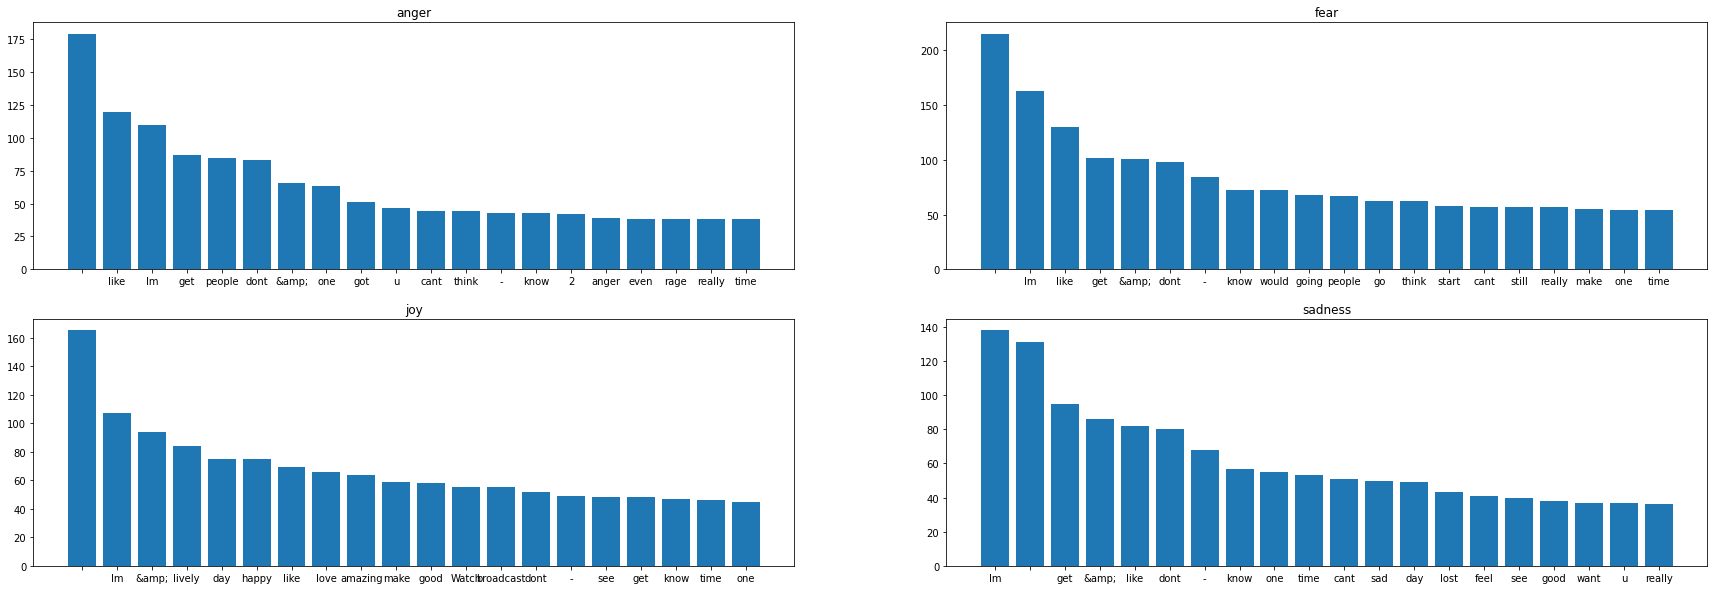

In [92]:
def create_hist_data(df):
    return np.concatenate(df["words_clean"].to_numpy())


splitted_data = []
for data_set in data_sets:
    splitted_data.append(create_hist_data(data_set))


_figure, axis = plt.subplots(2, 2)
_figure.set_size_inches(30,10)
print_word_hist(place=axis[0, 0], data=splitted_data[0], title=data_names[0])
print_word_hist(place=axis[0, 1], data=splitted_data[1], title=data_names[1])
print_word_hist(place=axis[1, 0], data=splitted_data[2], title=data_names[2])
print_word_hist(place=axis[1, 1], data=splitted_data[3], title=data_names[3])

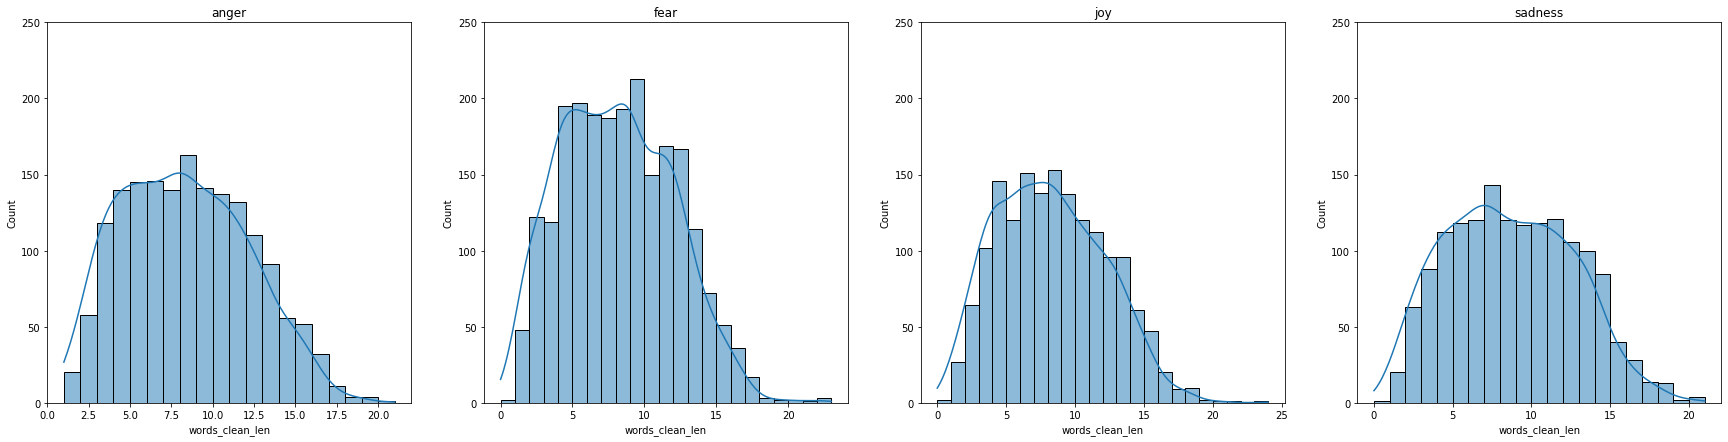

In [93]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30,7)

for ax in axs:
    ax.set(ylim=(0, 250))

for df, name, idx in zip(data_sets, data_names, range(4)):
    sns.histplot(
        data=df, 
        x="words_clean_len",
        binwidth=1,
        ax=axs[idx],
        kde=True
    ).set_title(name)

## Hashtag Histogram

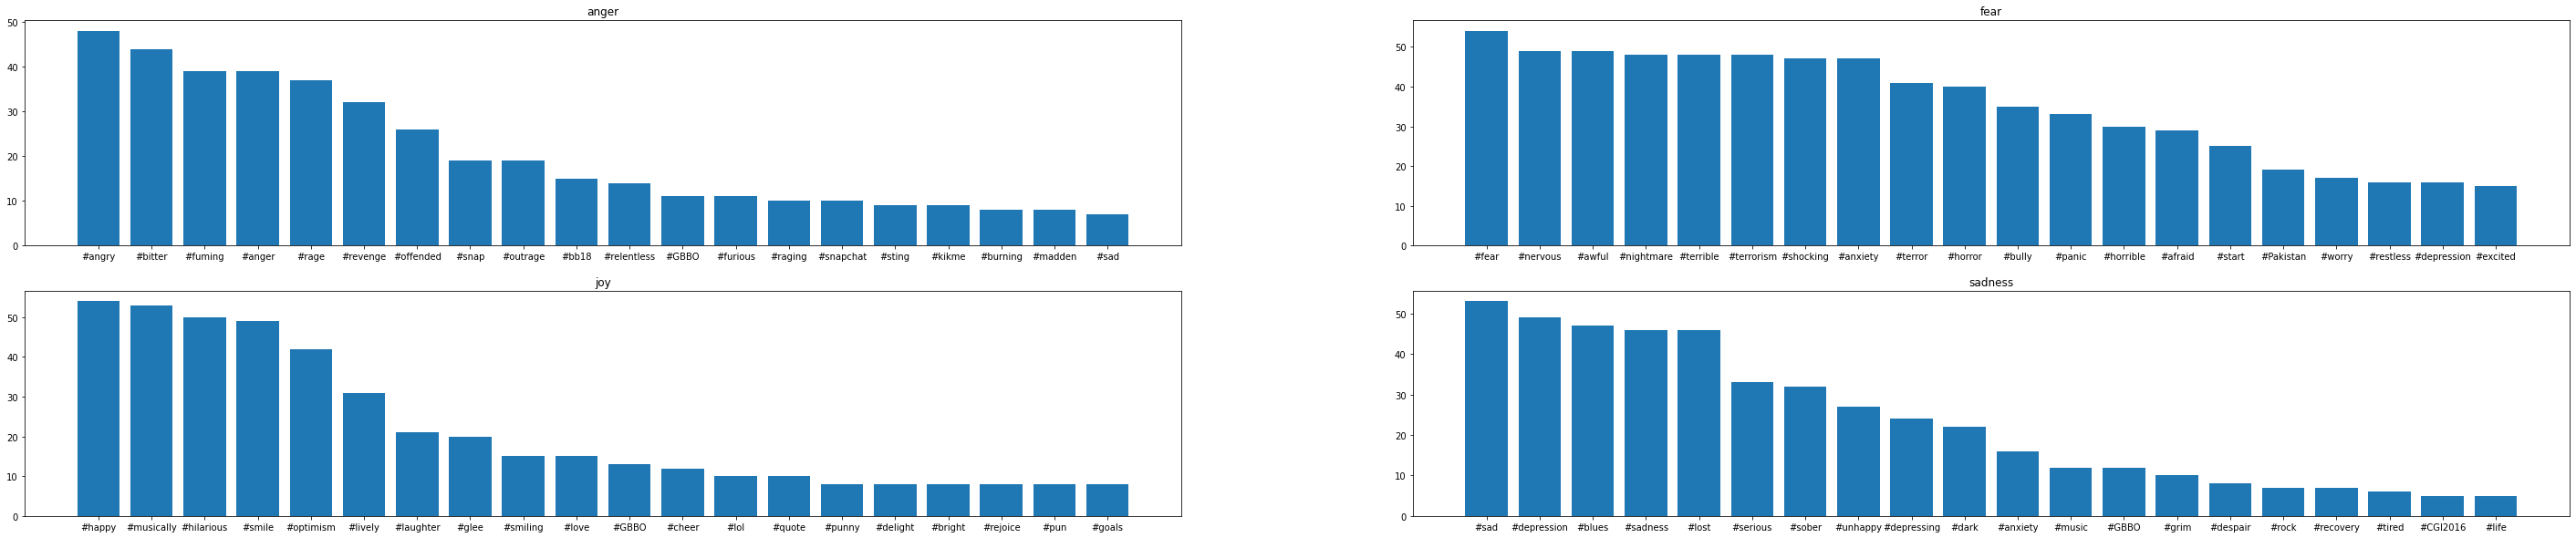

In [94]:
def create_hist_data(df):
    return np.concatenate(df["hashtags"].to_numpy())


splitted_data = []
for data_set in data_sets:
    splitted_data.append(create_hist_data(data_set))


_figure, axis = plt.subplots(2, 2)
_figure.set_size_inches(50,10)
print_word_hist(place=axis[0, 0], data=splitted_data[0], title=data_names[0])
print_word_hist(place=axis[0, 1], data=splitted_data[1], title=data_names[1])
print_word_hist(place=axis[1, 0], data=splitted_data[2], title=data_names[2])
print_word_hist(place=axis[1, 1], data=splitted_data[3], title=data_names[3])

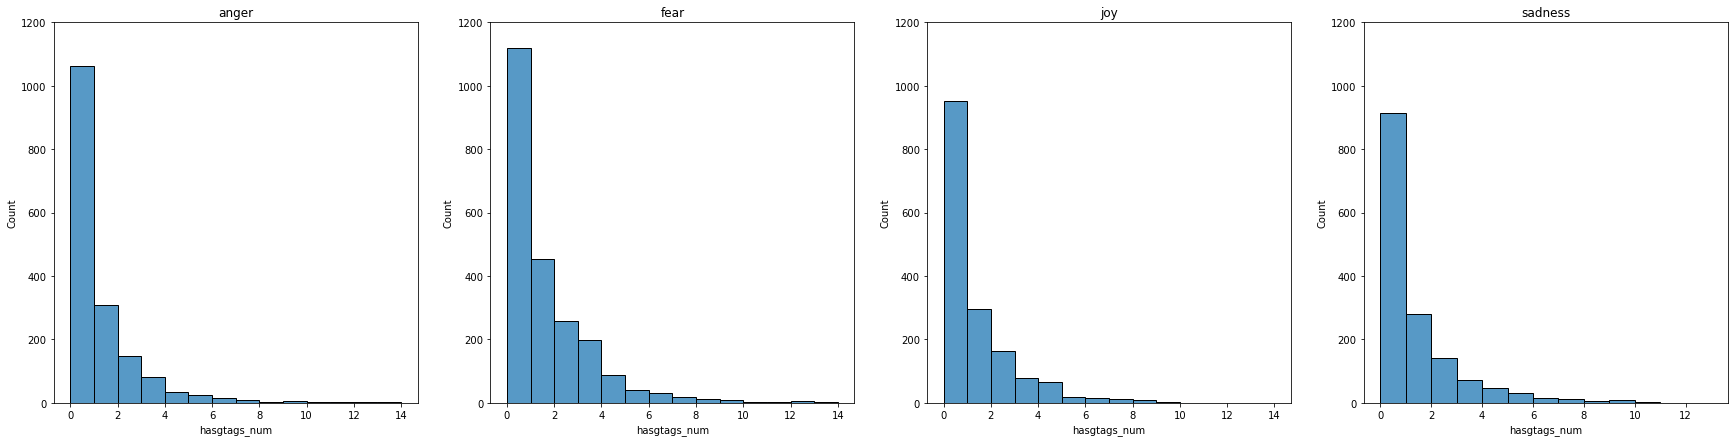

In [95]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30,7)

for ax in axs:
    ax.set(ylim=(0, 1200))

for df, name, idx in zip(data_sets, data_names, range(4)):
    sns.histplot(
        data=df, 
        x="hasgtags_num",
        binwidth=1,
        ax=axs[idx]
    ).set_title(name)

## Emojis

anger 
 ['😂' '😤' '🙄' '🙃' '😡' '😭' '😭😭' '😂😂😂' '😐' '😡😡' '🤗' '😩' '😅' '🙈😂😂' '🔥' '😘' '😧'
 '😬' '☺💦💦' '😂🙃']
fear 
 ['😂' '😳' '😩' '😕' '🙄' '😭' '🙈' '😅' '😐' '❤' '😱' '😊' '😂😂' '💕' '😰' '😡' '😓' '😁'
 '😭😭😭' '🙈🙈']
joy 
 ['😂' '😂😂' '☺' '😍' '🙄' '✨' '😂😂😂' '😕' '😐' '❤' '😍🙌🏻' '😀' '🎧' '😅' '🤗🤗🤗' '😏😏'
 '😭😢' '✏' '🔥🔥' '😭']
sadness 
 ['😂' '😭' '🙃' '😊' '😢' '😒' '🙄😂' '💕' '😂😂' '😩' '😪' '😭💔' '🤔' '😩🔫' '☹' '🎧' '😭😭😭'
 '🙁' '👌' '💯']


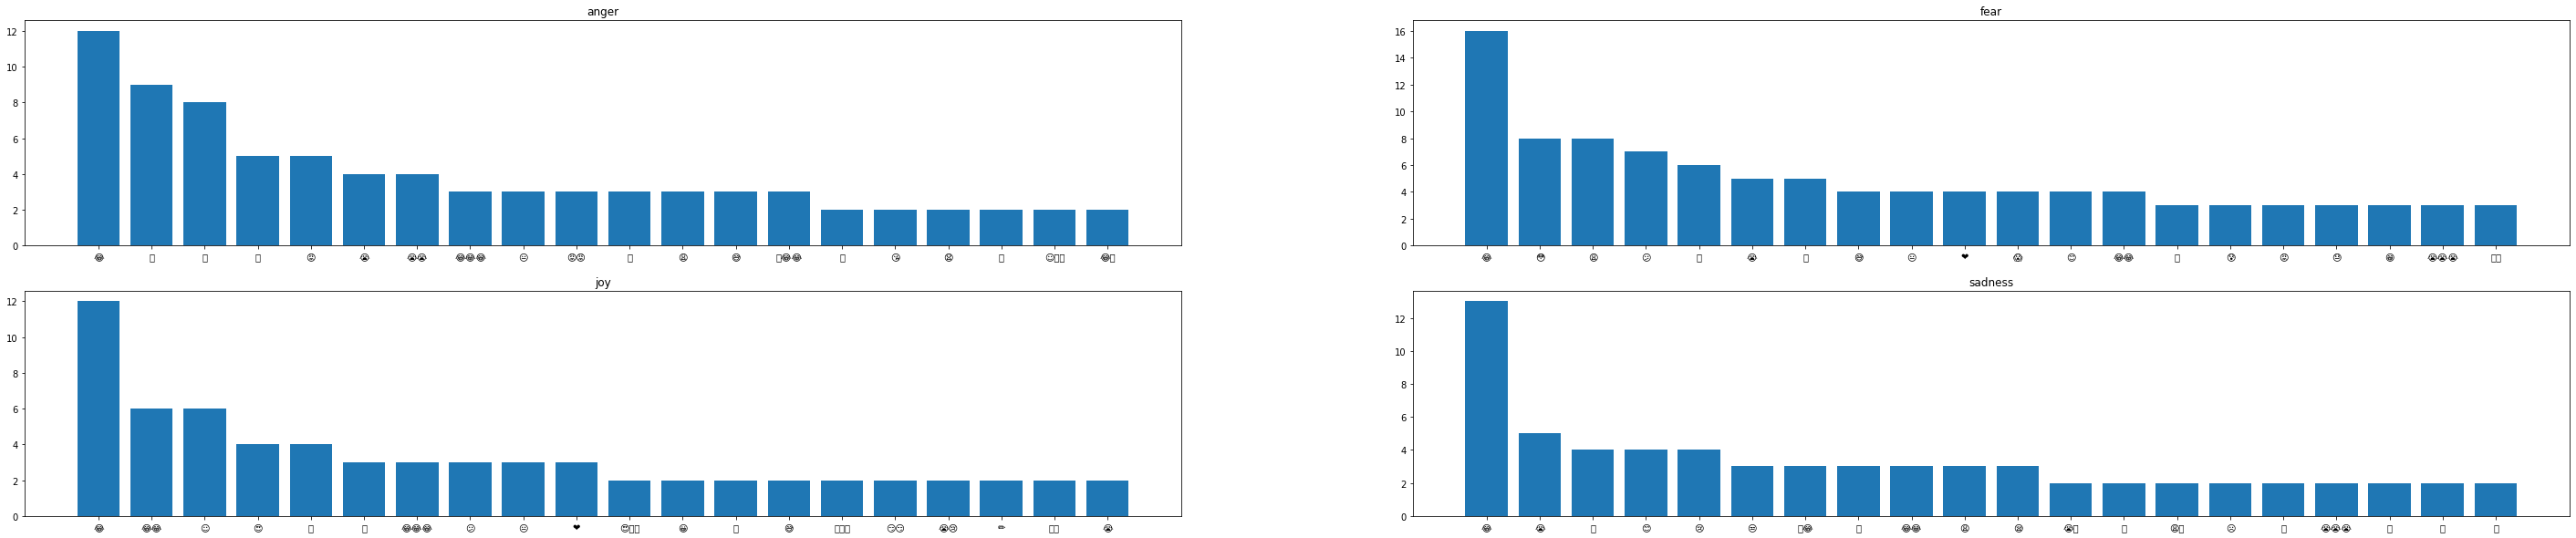

In [96]:
def create_hist_data(df):
    return np.concatenate(df["emojis"].to_numpy())


splitted_data = []
for data_set in data_sets:
    splitted_data.append(create_hist_data(data_set))


_figure, axis = plt.subplots(2, 2)
_figure.set_size_inches(50,10)
print_word_hist(place=axis[0, 0], data=splitted_data[0], title=data_names[0], print_val=True)
print_word_hist(place=axis[0, 1], data=splitted_data[1], title=data_names[1], print_val=True)
print_word_hist(place=axis[1, 0], data=splitted_data[2], title=data_names[2], print_val=True)
print_word_hist(place=axis[1, 1], data=splitted_data[3], title=data_names[3], print_val=True)

## number of taged versions

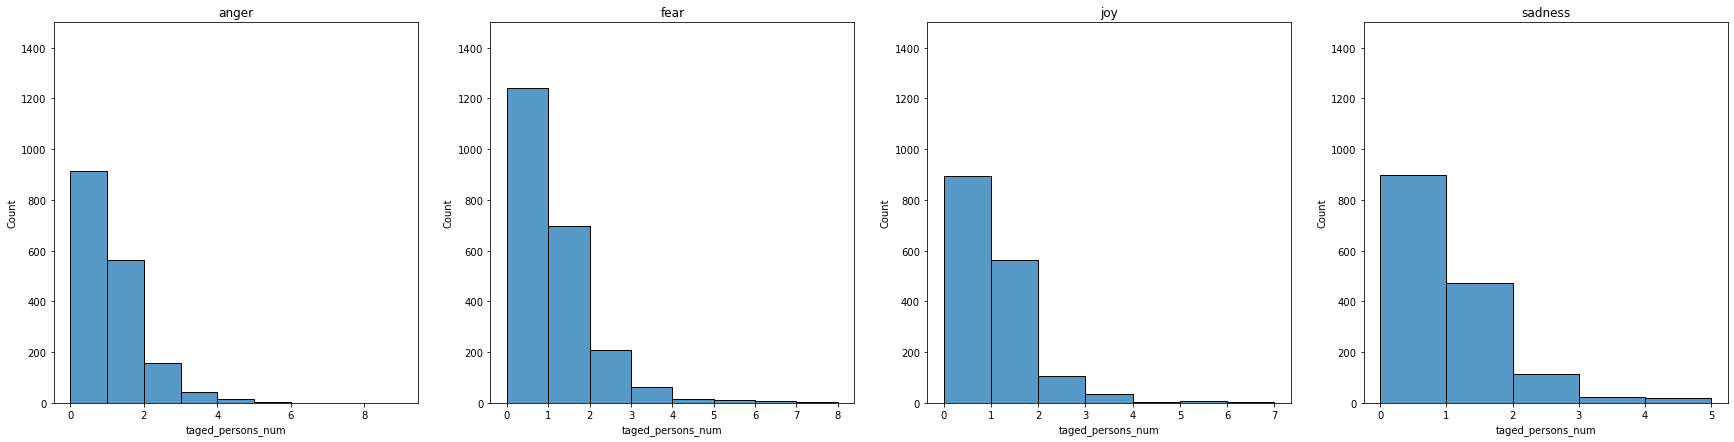

In [97]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30,7)

for ax in axs:
    ax.set(ylim=(0, 1500))

for df, name, idx in zip(data_sets, data_names, range(4)):
    sns.histplot(
        data=df, 
        x="taged_persons_num",
        binwidth=1,
        ax=axs[idx]
    ).set_title(name)

# Tokens
-----

## TF_IDF

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
df

/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/926450335.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/926450335.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])


,ID,Tweet,Affect Dimension,Intensity Score,taged_persons,taged_persons_num,hashtags,hasgtags_num,emojis,emojis_len,words,words_len,words_clean,words_clean_len,removed_words
0,2017-En-10264,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger,0.562,"[@xandraaa5, @amayaallyn6]",2,[#offended],1,[],0,"[shut, up, hashtags, are, cool]",5,"[shut, hashtags, cool]",3,2
1,2017-En-10072,it makes me so fucking irate jesus nobody is c...,anger,0.750,[],0,[],0,[],0,"[it, makes, me, so, fucking, irate, jesus, nob...",20,"[makes, fucking, irate, jesus, nobody, calling...",13,7
2,2017-En-11383,Lol Adam the Bull with his fake outrage,anger,0.417,[],0,[],0,[],0,"[Lol, Adam, the, Bull, with, his, fake, outrage]",8,"[Lol, Adam, Bull, fake, outrage]",5,3
3,2017-En-11102,@THATSSHAWTYLO passed away early this morning ...,anger,0.354,[@THATSSHAWTYLO],1,[],0,[],0,"[passed, away, early, this, morning, in, a, fa...",24,"[passed, away, early, morning, fast, furious, ...",16,8
4,2017-En-11506,@Kristiann1125 lol wow i was gonna say really ...,anger,0.438,[@Kristiann1125],1,[],0,[],0,"[lol, wow, i, was, gonna, say, really, haha, h...",21,"[lol, wow, gonna, say, really, haha, seen, chr...",14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,2017-En-41401,"If Troyler will die, Im gonna die with them\n#...",sadness,0.798,[],0,"[#sadness, #fuckinlifeisnotafairytale]",2,[],0,"[If, Troyler, will, die,, Im, gonna, die, with...",9,"[Troyler, die,, Im, gonna, die, them\n#troyler]",6,3
1529,2017-En-40544,Damn gud #premiere #LethalWeapon#funny and #se...,sadness,0.375,[],0,"[#premiere, #LethalWeapon#funny, #serious]",3,[],0,"[Damn, gud, and]",3,"[Damn, gud]",2,1
1530,2017-En-40489,#vinb Im alot more interested in hearing bout ...,sadness,0.417,[],0,"[#vinb, #vinb]",2,[],0,"[Im, alot, more, interested, in, hearing, bout...",17,"[Im, alot, interested, hearing, bout, differen...",14,3
1531,2017-En-40991,Overwhelming sadness This too shall pass #los...,sadness,0.889,[],0,"[#lost, #lonley, #startingover]",3,[],0,"[Overwhelming, sadness, This, too, shall, pass]",7,"[Overwhelming, sadness, shall, pass]",4,3


In [100]:
vectorizer = TfidfVectorizer()

corpus = [' '.join(x) for x in df["words"].to_numpy()]
# corpus = df["Tweet"].to_numpy()
X = vectorizer.fit_transform(corpus)

In [101]:
features = []
for row in X:
    y = row.toarray()
    y = y[y!=0]
    features.append(y)

In [102]:
df["feature"] = features


## Model

In [103]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [104]:
max_ = 0

for x in df["feature"].to_numpy():
    length = len(x)
    if length > max_:
        max_ = length

values = []
for x in df["feature"].to_numpy():
    x = np.append(x, [0] * (max_ - len(x)))
    values.append(x)

df["features_norm"] = values
df = pd.get_dummies(df, columns=["Affect Dimension"])


names = [f"feature_{i}" for i in range(max_)]
model_df = df[["taged_persons_num", "hasgtags_num", "emojis_len", "words_len", "features_norm", "Intensity Score", "Affect Dimension_anger", "Affect Dimension_fear", "Affect Dimension_joy", "Affect Dimension_sadness"]]
model_df[names] = model_df["features_norm"].to_list()


df_train = model_df.sample(frac = 0.7)
df_valid = model_df.drop(df_train.index)
len(df_valid), len(df_train)

/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/215076775.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[names] = model_df["features_norm"].to_list()
/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/215076775.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[names] = model_df["features_norm"].to_list()
/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/215076775.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

(243, 4971)

In [105]:
model_df

,taged_persons_num,hasgtags_num,emojis_len,words_len,features_norm,Intensity Score,Affect Dimension_anger,Affect Dimension_fear,Affect Dimension_joy,Affect Dimension_sadness,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
0,2,1,0,5,"[0.25915260239599514, 0.49392772877662205, 0.6...",0.562,1,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,20,"[0.3223935390172288, 0.26848750558795526, 0.19...",0.750,1,0,0,0,...,0.130481,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,8,"[0.49195582655265024, 0.49195582655265024, 0.4...",0.417,1,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,24,"[0.13904310725812621, 0.07917670621330096, 0.1...",0.354,1,0,0,0,...,0.294027,0.160254,0.110452,0.12513,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,21,"[0.2878281394935439, 0.29358053764738795, 0.15...",0.438,1,0,0,0,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,0,2,0,9,"[0.5317901767272659, 0.23752725658820634, 0.15...",0.798,0,0,0,1,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1529,0,3,0,3,"[0.22482521453344614, 0.5947570985911161, 0.77...",0.375,0,0,0,1,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1530,0,2,0,17,"[0.26544366019569055, 0.19574807340665126, 0.2...",0.417,0,0,0,1,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1531,0,3,0,7,"[0.49889245978015734, 0.5101546034171441, 0.38...",0.889,0,0,0,1,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
def accuracy(outputs, labels):
    outputs = outputs.flatten() 
    labels = labels.flatten() 
    x = outputs-labels
    x = torch.abs(x)
    x = torch.sum(x)
    return torch.sum(x) / len(labels)

In [109]:
class Regessor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.dense_in = nn.Linear(input_dim, 64)
        self.dense_1 = nn.Linear(64, 64)
        self.dense_out = nn.Linear(64, 1)

        self.relu = nn.ReLU()

        self.loss = nn.MSELoss()

    def forward(self, x):
        x = x.float()
        x = self.dense_in(x)
        x = self.relu(x)
        
        x = self.dense_1(x)
        x = self.relu(x)

        x = self.dense_out(x)
        # x = self.relu(x)

        return x

    

    def step(self, batch):
        data, labels = batch
        data = data.to(torch.float32)
        labels = labels.to(torch.float32)
        out = self(data)
        loss = self.loss(out, labels)
        return loss.float()
        
    def valid(self, batch):
        data, labels = batch
        out = self(data)
        loss = self.loss(out, labels)
        acc = accuracy(out, labels)

        return {"loss": loss.item(), "acc": acc.item()}


    def valid_end(self, outputs):
        batch_losses = [x['loss'] for x in outputs]
        epoch_loss = np.average(batch_losses)
        batch_accs = [x['acc'] for x in outputs]
        epoch_acc = np.average(batch_accs)

        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("epoch [{}]".format(epoch), end=', ')
        print("val_loss", result['val_loss'], end=', ')
        print("val_acc", result['val_acc'])


In [110]:
def evaluate(model, val_loader):
    outputs = [model.valid(batch) for batch in val_loader]
    return model.valid_end(outputs)


In [111]:
feature_set = ["Affect Dimension_anger", "Affect Dimension_fear", "Affect Dimension_joy", "Affect Dimension_sadness"] + names
# feature_set = ["taged_persons_num", "hasgtags_num", "emojis_len", "words_len", "Affect Dimension_anger", "Affect Dimension_fear", "Affect Dimension_joy", "Affect Dimension_sadness"] + names
# feature_set = names


model = Regessor(input_dim=len(feature_set))
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
history = []
epochs = 5
batch_size = 32



train_data = list(zip(df_train[feature_set].to_numpy().astype(float), df_train["Intensity Score"].to_numpy().astype(float)))
val_data = list(zip(df_valid[feature_set].to_numpy().astype(float), df_valid["Intensity Score"].to_numpy().astype(float)))


train_loader = DataLoader(train_data, batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size)

model.eval()
result = evaluate(model, val_loader)
model.epoch_end("start", result)

for epoch in range(epochs):
        model.train()
        
        for batch in train_loader:
            loss = model.step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        model.eval()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)


epoch [start], val_loss 0.42484802865999693, val_acc 0.6261824971016277
epoch [0], val_loss 0.07184441877805893, val_acc 0.21409428983316514
epoch [1], val_loss 0.03407260111979137, val_acc 0.14685555547500323
epoch [2], val_loss 0.033455065605687395, val_acc 0.14726205969822448
epoch [3], val_loss 0.03311442134260058, val_acc 0.1477064110624457
epoch [4], val_loss 0.0330122537466965, val_acc 0.14820620042330734


In [112]:
from sklearn.neural_network import MLPRegressor

X_train = df_train[feature_set].to_numpy().astype(float)
y_train = df_train["Intensity Score"].to_numpy().astype(float)

X_test = df_valid[feature_set].to_numpy().astype(float)
y_test = df_valid["Intensity Score"].to_numpy().astype(float)

regr = MLPRegressor(random_state=1, max_iter=3000).fit(X_train, y_train)
pred =  regr.predict(X_test)
np.average(np.absolute(np.array(y_test-pred)))

0.14372117129862214

In [39]:
# Was habe ich hier gelernt?
# Auf grund der Relevanz der Wörter, wie relevant die für den Score ist. und die Reihenfolge der Wörter
# Es fehlt das Wort an sich selber

# Model die Zweite
------

## Model Definition

In [40]:
data_sets, data_names = create_dataset()
df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
df

/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/1708860957.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/1708860957.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])


,ID,Tweet,Affect Dimension,Intensity Score,taged_persons,taged_persons_num,hashtags,hasgtags_num,emojis,emojis_len,words,words_len,words_clean,words_clean_len,removed_words
0,2017-En-10264,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger,0.562,"[@xandraaa5, @amayaallyn6]",2,[#offended],1,[],0,"[shut, up, hashtags, are, cool]",5,"[shut, hashtags, cool]",3,2
1,2017-En-10072,it makes me so fucking irate jesus nobody is c...,anger,0.750,[],0,[],0,[],0,"[it, makes, me, so, fucking, irate, jesus, nob...",20,"[makes, fucking, irate, jesus, nobody, calling...",13,7
2,2017-En-11383,Lol Adam the Bull with his fake outrage,anger,0.417,[],0,[],0,[],0,"[Lol, Adam, the, Bull, with, his, fake, outrage]",8,"[Lol, Adam, Bull, fake, outrage]",5,3
3,2017-En-11102,@THATSSHAWTYLO passed away early this morning ...,anger,0.354,[@THATSSHAWTYLO],1,[],0,[],0,"[passed, away, early, this, morning, in, a, fa...",24,"[passed, away, early, morning, fast, furious, ...",16,8
4,2017-En-11506,@Kristiann1125 lol wow i was gonna say really ...,anger,0.438,[@Kristiann1125],1,[],0,[],0,"[lol, wow, i, was, gonna, say, really, haha, h...",21,"[lol, wow, gonna, say, really, haha, seen, chr...",14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,2017-En-41401,"If Troyler will die, Im gonna die with them\n#...",sadness,0.798,[],0,"[#sadness, #fuckinlifeisnotafairytale]",2,[],0,"[If, Troyler, will, die,, Im, gonna, die, with...",9,"[Troyler, die,, Im, gonna, die, them\n#troyler]",6,3
1529,2017-En-40544,Damn gud #premiere #LethalWeapon#funny and #se...,sadness,0.375,[],0,"[#premiere, #LethalWeapon#funny, #serious]",3,[],0,"[Damn, gud, and]",3,"[Damn, gud]",2,1
1530,2017-En-40489,#vinb Im alot more interested in hearing bout ...,sadness,0.417,[],0,"[#vinb, #vinb]",2,[],0,"[Im, alot, more, interested, in, hearing, bout...",17,"[Im, alot, interested, hearing, bout, differen...",14,3
1531,2017-En-40991,Overwhelming sadness This too shall pass #los...,sadness,0.889,[],0,"[#lost, #lonley, #startingover]",3,[],0,"[Overwhelming, sadness, This, too, shall, pass]",7,"[Overwhelming, sadness, shall, pass]",4,3


In [41]:
def accuracy(outputs, labels):
    outputs = outputs.flatten() 
    labels = labels.flatten() 
    x = outputs-labels
    x = torch.abs(x)
    x = torch.sum(x)
    return torch.sum(x) / len(labels)

In [42]:
class Regessor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.dense_in = nn.Linear(input_dim, 1024)
        self.dense_1 = nn.Linear(1024, 256)
        self.dense_out = nn.Linear(256, 1)
        self.drop_out_1 = nn.Dropout(p=0.5)
        self.drop_out_2 = nn.Dropout(p=0.5)

        self.relu = nn.ReLU()

        self.loss = nn.MSELoss()

    def forward(self, x):
        x = x.float()
        x = self.dense_in(x)
        x = self.relu(x)
        x = self.drop_out_1(x)
        
        x = self.dense_1(x)
        x = self.relu(x)
        x = self.drop_out_2(x)

        x = self.dense_out(x)
        # x = self.relu(x)

        return x

    

    def step(self, batch):
        data, labels = batch
        data = data.to(torch.float32)
        labels = labels.to(torch.float32)
        out = self(data)
        loss = self.loss(out, labels)
        return loss.float()
        
    def valid(self, batch):
        data, labels = batch
        out = self(data)
        loss = self.loss(out, labels)
        acc = accuracy(out, labels)

        return {"loss": loss.item(), "acc": acc.item()}


    def valid_end(self, outputs):
        batch_losses = [x['loss'] for x in outputs]
        epoch_loss = np.average(batch_losses)
        batch_accs = [x['acc'] for x in outputs]
        epoch_acc = np.average(batch_accs)

        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("epoch [{}]".format(epoch), end=', ')
        print("val_loss", result['val_loss'], end=', ')
        print("val_acc", result['val_acc'])


In [43]:
def evaluate(model, val_loader):
    outputs = [model.valid(batch) for batch in val_loader]
    return model.valid_end(outputs)

In [44]:
epochs = 200
batch_size = 64

In [45]:
def fit(model, val_loader, train_loader, epochs=epochs):
    history = []
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    sheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=2, threshold=0.001, threshold_mode='abs', cooldown=0, min_lr=0, eps=1e-10, verbose=False)

    model.eval()
    result = evaluate(model, val_loader)
    train_result = evaluate(model, train_loader)
    train_result = {
        "train_loss": train_result["val_loss"],
        "train_acc": train_result["val_acc"]
    }

    history.append({**result, **train_result})

    for epoch in range(epochs):
            model.train()
            
            for idx, batch in enumerate(train_loader):
                loss = model.step(batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

            model.eval()
            result = evaluate(model, val_loader)

            train_result = evaluate(model, train_loader)
            train_result = {
                "train_loss": train_result["val_loss"],
                "train_acc": train_result["val_acc"]
            }

            # model.epoch_end(epoch, result)
            sheduler.step(result['val_loss'])
            history.append({**result, **train_result})
    
    return history, model


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
epochs_total = 100
def start_training(df, name, column, method=CountVectorizer, concat = True):
    if concat:
        tweets = [' '.join(x) for x in df[column].to_numpy()]
    else:
        tweets = df[column].to_numpy()

    cv = method().fit(tweets)
    bag_len  = len(cv.get_feature_names_out())

    if concat:
        df["features"] = df[column].map(lambda x: cv.transform([' '.join(x)]).toarray())
    else:
        df["features"] = df[column].map(lambda x: cv.transform([x]).toarray())



    df_train = df.sample(frac = 0.7)
    df_valid = df.drop(df_train.index)


    train_data = list(zip(df_train["features"].to_numpy()[0], df_train["Intensity Score"].to_numpy().astype(float)))
    val_data = list(zip(df_valid["features"].to_numpy()[0], df_valid["Intensity Score"].to_numpy().astype(float)))


    model = Regessor(input_dim=bag_len)

    train_loader = DataLoader(train_data, batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size)

    print("try fit: ", name)
    return fit(model, val_loader, train_loader, epochs=epochs_total)[0]

In [48]:
def print_results(histories, small=False, compare=True):
    colors = ["red", "green", "blue",  "yellow"]
    if not small:
        loss = np.array([x["val_loss"] for val in histories for x in val]).reshape(4,epochs_total+1)
        acc = np.array([x["val_acc"] for val in histories for x in val]).reshape(4,epochs_total+1)


        for (x, color, name) in zip(loss, colors, data_names):
            print(f"[LOSS] {name}: min: {min(x)}")
            sns.lineplot(data= x, color = color)

        plt.legend(labels=data_names)
        plt.title("Loss")
        plt.show()

        colors = ["red", "green", "blue",  "yellow"]
        for (x, color, name) in zip(acc, colors, data_names):
            print(f"[ACC]: {name}: min: {min(x)}")
            sns.lineplot(data= x, color = color)

        plt.legend(labels=data_names)
        plt.title("Accurancy")
        plt.show()

    else:
        loss_val = np.array([x["val_loss"] for x in hist])
        loss_train = np.array([x["train_loss"] for x in hist])


        print(f"[LOSS] All: min: {min(loss_val)}")
        sns.lineplot(data=loss_val, color = colors[0])
        sns.lineplot(data=loss_train, color = colors[1])
        plt.legend(labels=["Validation Loss", "Train Loss"])
        plt.title("Loss")
        plt.show()


        val_acc = np.array([x["val_acc"] for x in hist])
        train_val = np.array([x["train_acc"] for x in hist])


        print(f"[ACC] All: min: {min(val_acc)}")
        sns.lineplot(data=val_acc, color = colors[0])
        sns.lineplot(data=train_val, color = colors[1])
        plt.legend(labels=["Validation Acc", "Train Acc"])
        plt.title("Accurancy")
        plt.show()


## Count Vectorizer

### Tweet

try fit:  anger
try fit:  fear
try fit:  joy
try fit:  sadness
[LOSS] anger: min: 0.0074244993555778035
[LOSS] fear: min: 5.285154460942845e-08
[LOSS] joy: min: 0.3567767213638
[LOSS] sadness: min: 0.12778044779304865


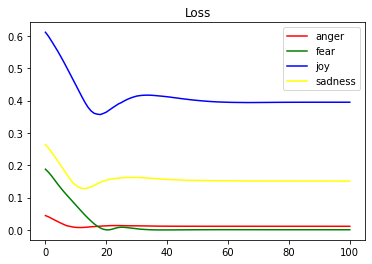

[ACC]: anger: min: 0.08616553461551668
[ACC]: fear: min: 0.0002298946380615008
[ACC]: joy: min: 0.5973078949451447
[ACC]: sadness: min: 0.35746391117572784


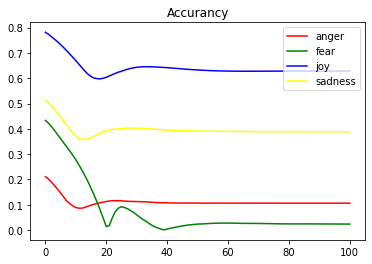

In [49]:
data_sets, data_names = create_dataset()
histories = []
for data, name in zip(data_sets, data_names):
    histories.append(start_training(data, name, "Tweet", concat=False))

print_results(histories)

### words 

try fit:  anger
try fit:  fear
try fit:  joy
try fit:  sadness
[LOSS] anger: min: 0.07060183680897941
[LOSS] fear: min: 0.1160841245665441
[LOSS] joy: min: 0.47196556484573293
[LOSS] sadness: min: 0.33276000902115904


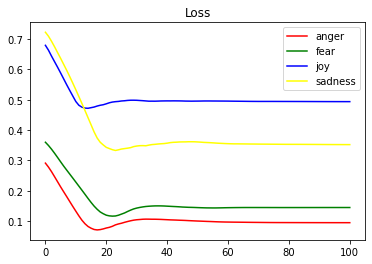

[ACC]: anger: min: 0.26571006155014043
[ACC]: fear: min: 0.3407112040519714
[ACC]: joy: min: 0.6869974998831749
[ACC]: sadness: min: 0.5768535420894623


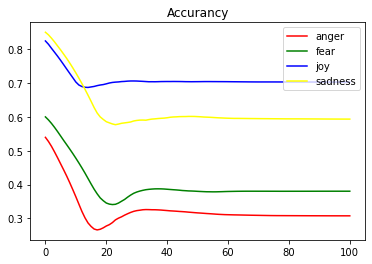

In [50]:
data_sets, data_names = create_dataset()
histories = []
for data, name in zip(data_sets, data_names):
    histories.append(start_training(data, name, "words"))

print_results(histories)

### words clean

try fit:  anger
try fit:  fear
try fit:  joy
try fit:  sadness
[LOSS] anger: min: 0.19228709450840567
[LOSS] fear: min: 0.16930193952408737
[LOSS] joy: min: 0.5962782583497864
[LOSS] sadness: min: 0.5604784483497394


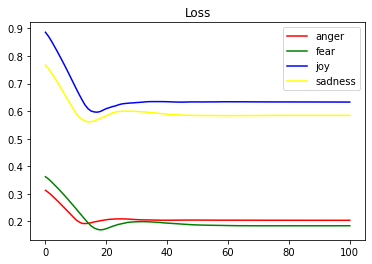

[ACC]: anger: min: 0.43850552392005926
[ACC]: fear: min: 0.41146316909790037
[ACC]: joy: min: 0.7721905583143234
[ACC]: sadness: min: 0.7486510858535766


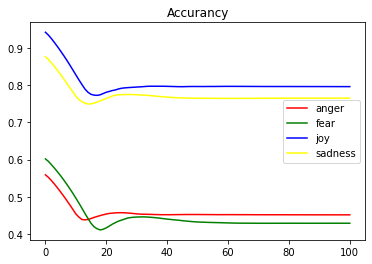

In [51]:
data_sets, data_names = create_dataset()
histories = []
for data, name in zip(data_sets, data_names):
    histories.append(start_training(data, name, "words_clean"))

print_results(histories)

### all words clean

/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/3871312411.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/3871312411.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])


try fit:  all
[LOSS] All: min: 0.011302719447272768


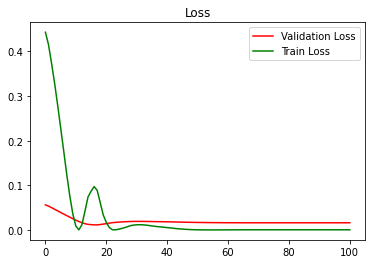

[ACC] All: min: 0.10631424856185914


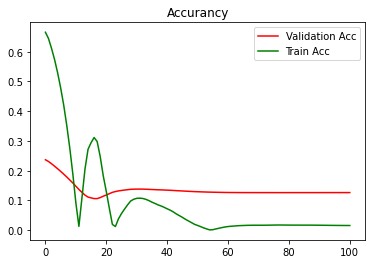

In [52]:
data_sets, data_names = create_dataset()
df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
hist = start_training(df, "all", "words_clean")

print_results(hist, small=True, compare=True)

### words clean + hastags

/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/2594284561.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/2594284561.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])


try fit:  all
[LOSS] All: min: 0.06392562450043227


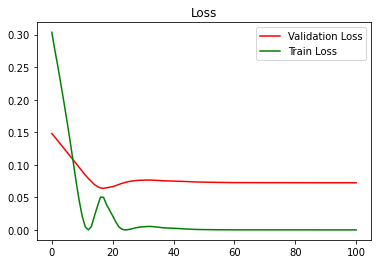

[ACC] All: min: 0.2528351725935936


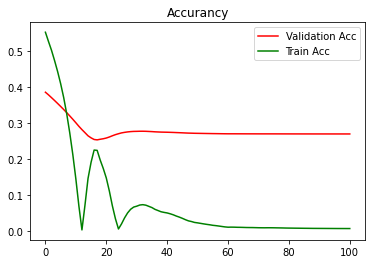

In [53]:
data_sets, data_names = create_dataset()
df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
df["features"] = df["words_clean"] + df["hashtags"] 
hist = start_training(df, "all", "features")
print_results(hist, small=True)

## TFIDI

### Tweets

try fit:  anger
try fit:  fear
try fit:  joy
try fit:  sadness
[LOSS] anger: min: 0.0004963503637792784
[LOSS] fear: min: 0.023573457703764577
[LOSS] joy: min: 0.5708326092839592
[LOSS] sadness: min: 0.49856279606864856


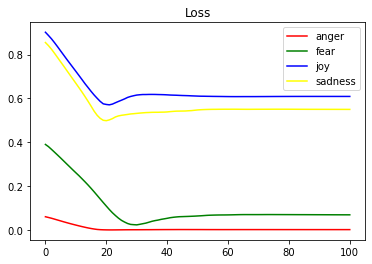

[ACC]: anger: min: 0.02227892196178438
[ACC]: fear: min: 0.1535365028381348
[ACC]: joy: min: 0.7555346512794494
[ACC]: sadness: min: 0.7060897932052612


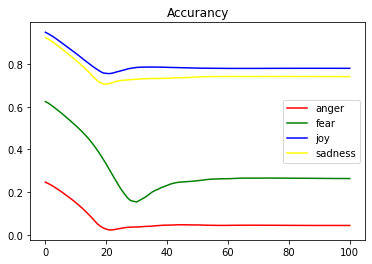

In [54]:
data_sets, data_names = create_dataset()
histories = []
for data, name in zip(data_sets, data_names):
    histories.append(start_training(data, name, "Tweet", concat=False, method=TfidfVectorizer))

print_results(histories)


### Words

try fit:  anger
try fit:  fear
try fit:  joy
try fit:  sadness
[LOSS] anger: min: 3.7177557497675126e-08
[LOSS] fear: min: 0.1946921156676132
[LOSS] joy: min: 0.37751982980952586
[LOSS] sadness: min: 0.028881755793242


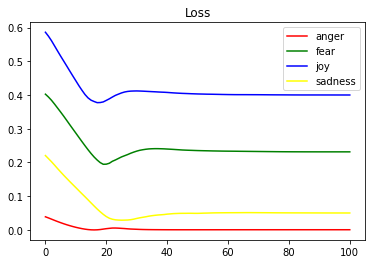

[ACC]: anger: min: 0.0001928148269653429
[ACC]: fear: min: 0.4412392952442169
[ACC]: joy: min: 0.6144264234304428
[ACC]: sadness: min: 0.1699463320970535


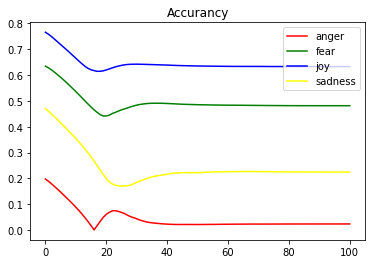

In [55]:
data_sets, data_names = create_dataset()
histories = []
for data, name in zip(data_sets, data_names):
    histories.append(start_training(data, name, "words", concat=True, method=TfidfVectorizer))

print_results(histories)

### words clean

try fit:  anger
try fit:  fear
try fit:  joy
try fit:  sadness
[LOSS] anger: min: 0.13207410953901194
[LOSS] fear: min: 0.004629823192780929
[LOSS] joy: min: 1.1992840564449647e-06
[LOSS] sadness: min: 0.3772146711487194


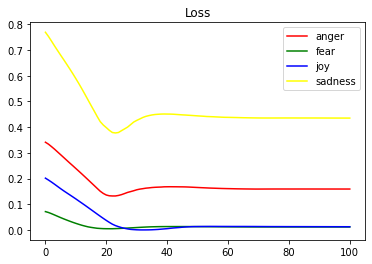

[ACC]: anger: min: 0.3634200180768967
[ACC]: fear: min: 0.06804280412197111
[ACC]: joy: min: 0.0010951182842254825
[ACC]: sadness: min: 0.6141780451536178


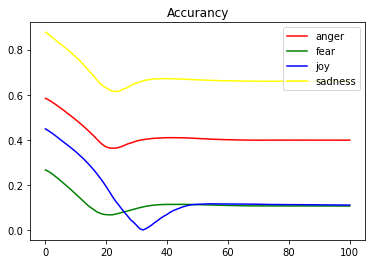

In [56]:
data_sets, data_names = create_dataset()
histories = []
for data, name in zip(data_sets, data_names):
    histories.append(start_training(data, name, "words_clean", concat=True, method=TfidfVectorizer))

print_results(histories)

### all words clean

/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/1132644816.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/1132644816.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])


try fit:  all
[LOSS] All: min: 0.12499427131781086


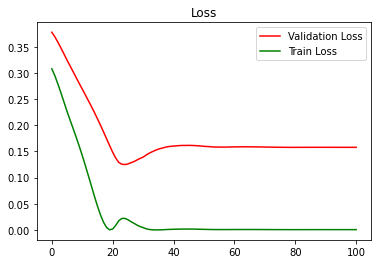

[ACC] All: min: 0.3535452889204025


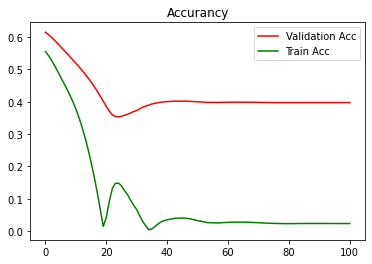

In [57]:
data_sets, data_names = create_dataset()
df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
hist = start_training(df, "all", "words_clean", method=TfidfVectorizer)

print_results(hist, small=True)

### words clean + hashtags

/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/2732947272.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/2732947272.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])


try fit:  all
[LOSS] All: min: 0.0578539564834637


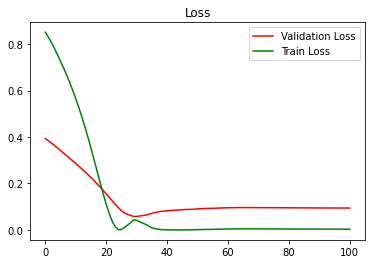

[ACC] All: min: 0.24052849411964417


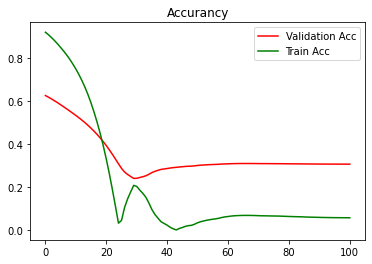

In [58]:
data_sets, data_names = create_dataset()
df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
df["features"] = df["words_clean"] + df["hashtags"] 

hist = start_training(df, "all", "features", method=TfidfVectorizer)

print_results(hist, small=True)

# Words clean + hastags + type
-----

## Model Definition

In [59]:
def accuracy(outputs, labels):
    outputs = outputs.flatten() 
    labels = labels.flatten() 
    x = outputs-labels
    x = torch.abs(x)
    x = torch.sum(x)
    return torch.sum(x) / len(labels)

In [60]:
class Regessor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.dense_in = nn.Linear(input_dim, 512)
        self.dense_1 = nn.Linear(512, 64)
        self.dense_type = nn.Linear(4, 1)

        self.dense_out = nn.Linear(65, 1)

        self.relu = nn.ReLU()

        self.loss = nn.MSELoss()

    def forward(self, x, y):
        x = x.float()
        x = self.dense_in(x)
        x = self.relu(x)
        x = self.dense_1(x)
        x = self.relu(x)

        y = self.dense_type(y)
        y = self.relu(y)

        x = torch.cat((x, y), 1)

        x = self.dense_out(x)
        # x = self.relu(x)

        return x

    

    def step(self, batch):
        data, tweet_type, labels = batch

        data = data.to(torch.float32)
        tweet_type = tweet_type.to(torch.float32)
        labels = labels.to(torch.float32)


        out = self(data, tweet_type)
        loss = self.loss(out, labels)
        return loss.float()
        
    def valid(self, batch):
        data, tweet_type, labels = batch

        data = data.to(torch.float32)
        tweet_type = tweet_type.to(torch.float32)
        labels = labels.to(torch.float32)

        out = self(data, tweet_type)
        loss = self.loss(out, labels)
        acc = accuracy(out, labels)

        return {"loss": loss.item(), "acc": acc.item()}


    def valid_end(self, outputs):
        batch_losses = [x['loss'] for x in outputs]
        epoch_loss = np.average(batch_losses)
        batch_accs = [x['acc'] for x in outputs]
        epoch_acc = np.average(batch_accs)

        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("epoch [{}]".format(epoch), end=', ')
        print("val_loss", result['val_loss'], end=', ')
        print("val_acc", result['val_acc'])


In [61]:
def evaluate(model, val_loader):
    outputs = [model.valid(batch) for batch in val_loader]
    return model.valid_end(outputs)

In [62]:
epochs = 100
batch_size = 64

In [63]:
def fit(model, val_loader, train_loader, epochs=epochs):
    history = []
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    sheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=2, threshold=0.001, threshold_mode='abs', cooldown=0, min_lr=0, eps=1e-10, verbose=False)

    model.eval()
    result = evaluate(model, val_loader)
    train_result = evaluate(model, train_loader)
    train_result = {
        "train_loss": train_result["val_loss"],
        "train_acc": train_result["val_acc"]
    }

    history.append({**result, **train_result})


    for epoch in range(epochs):
            model.train()
            
            for idx, batch in enumerate(train_loader):
                loss = model.step(batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

            model.eval()
            result = evaluate(model, val_loader)
            
            train_result = evaluate(model, train_loader)
            train_result = {
                "train_loss": train_result["val_loss"],
                "train_acc": train_result["val_acc"]
            }

            history.append({**result, **train_result})
            sheduler.step(result['val_loss'])
    
    return history, model

/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/2795405222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
/var/folders/tw/9j5778px5l39kb_wg__3r0dm0000gn/T/ipykernel_93976/2795405222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])


try fit:  sadness
[LOSS] All: min: 0.13202960789203644


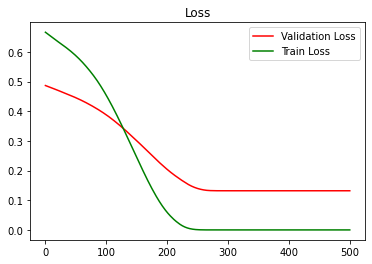

[ACC] All: min: 0.3633587956428528


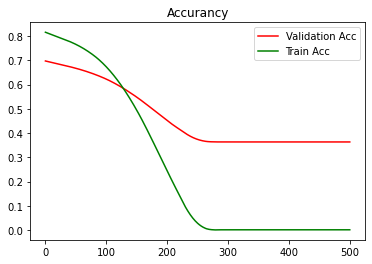

In [64]:
epochs_total = 500
def start_training():
    data_sets, data_names = create_dataset()
    df = data_sets[0].append(data_sets[1]).append(data_sets[2]).append(data_sets[3])
    df = pd.get_dummies(df, columns=["Affect Dimension"])
    df["features_tweet"] = df["words_clean"] + df["hashtags"] 
    
    tweets = [' '.join(x) for x in df["features_tweet"].to_numpy()]
    cv = TfidfVectorizer().fit(tweets)
    bag_len  = len(cv.get_feature_names_out())

    df["features_tweet"] = df["features_tweet"].map(lambda x: cv.transform([' '.join(x)]).toarray())
    
    



    df_train = df.sample(frac = 0.7)
    df_valid = df.drop(df_train.index)


    train_data = list(zip(
        df_train["features_tweet"].to_numpy()[0], 
        df_train[["Affect Dimension_anger", "Affect Dimension_fear", "Affect Dimension_joy", "Affect Dimension_sadness"]].to_numpy().astype(float), 
        df_train["Intensity Score"].to_numpy().astype(float)
    ))

    val_data = list(zip(
        df_valid["features_tweet"].to_numpy()[0], 
        df_valid[["Affect Dimension_anger", "Affect Dimension_fear", "Affect Dimension_joy", "Affect Dimension_sadness"]].to_numpy().astype(float), 
        df_valid["Intensity Score"].to_numpy().astype(float)
    ))


    model = Regessor(input_dim=bag_len)

    train_loader = DataLoader(train_data, batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size)

    print("try fit: ", name)
    return fit(model, val_loader, train_loader, epochs=epochs_total)[0]

hist = start_training()
print_results(hist, small=True)